In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaled_market_data = StandardScaler().fit_transform(market_data[['price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d',
                                                                'price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y']])


In [6]:
# Create a DataFrame with the scaled data


scaled_df = pd.DataFrame(
    scaled_market_data, 
    columns=['price_change_percentage_24h','price_change_percentage_7d','price_change_percentage_14d',
             'price_change_percentage_60d','price_change_percentage_200d','price_change_percentage_1y'])


# Copy the crypto names from the original data
scaled_df["coin_id"] = market_data.index

# Set the coinid column as index

scaled_df = scaled_df.set_index("coin_id")

# Display sample data

scaled_df.head()



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,
bitcoin,0.508529,0.493193,0.772200,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11


k = list(range(1, 11))

# Create an empty list to store the inertia values

inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters

for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
   
# 2. Fit the model to the data using the scaled DataFrame
    k_model.fit(scaled_df)

# 3. Append the model.inertia_ to the inertia list
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_crypto = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow_crypto


C:\Users\dclar\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dclar\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dclar\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\dclar\anaconda3\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans 

,k,inertia
0,1,246.000000
1,2,159.077798
2,3,112.831233
3,4,70.022051
4,5,59.123838
5,6,52.175452
6,7,40.415805
7,8,31.844516
8,9,27.357884
9,10,23.747139


<Axes: title={'center': 'Crypto Elbow Curve'}, xlabel='k'>

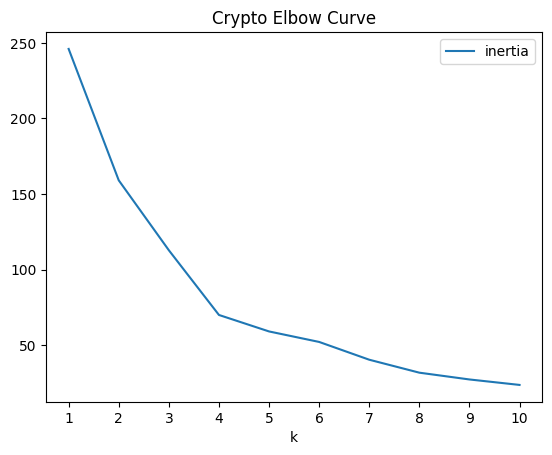

In [16]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

df_elbow_crypto.plot.line(x="k",
                   y="inertia",
                   title="Crypto Elbow Curve",
                   xticks=k)


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** 4 or maybe 5

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [17]:
# Initialize the K-Means model using the best value for k = 4
model = KMeans(n_clusters=4, n_init='auto', random_state=1)




In [18]:
# Fit the K-Means model using the scaled data
model.fit(scaled_df)


KMeans(n_clusters=4, random_state=1)

In [19]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(scaled_df)

# View the resulting array of cluster values.
print(crypto_clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 2 0 0 0 1 2 0 0 3 0 0 2 2
 0 0 0 0]


In [20]:
# Create a copy of the DataFrame
scaled_market_predictions = scaled_df.copy()


In [21]:
# Add a new column to the DataFrame with the predicted clusters
scaled_market_predictions["CryptoCluster"] = crypto_clusters

# Display sample data
scaled_market_predictions.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,CryptoCluster
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,-0.291203,-0.499848,-0.270317,1


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

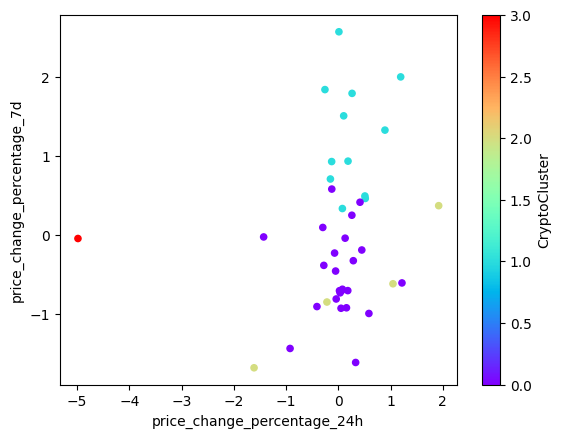

In [22]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.


scaled_market_predictions.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="CryptoCluster",
    colormap='rainbow')





### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)



In [25]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.

market_data_pca = pca.fit_transform(scaled_df)

# View the first five rows of the DataFrame. 
market_data_pca[:5]

array([[-0.81042853,  0.70540233,  0.27187782],
       [-0.55813749,  0.64685126,  0.77384784],
       [-0.3737915 , -0.46881956, -0.51100547],
       [-0.39653796, -0.51734123, -0.29924871],
       [-1.67179329,  2.031445  ,  1.32252571]])

In [26]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.43128896, 0.28264843, 0.19004125])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89% of the total variance is condensed into the 3 PCA variables

In [28]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
market_data_pca_df = pd.DataFrame(
    market_data_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)   

market_data_pca_df.head()


# Copy the crypto names from the original data
market_data_pca_df["coin_id"] = market_data.index

# Set the coinid column as index
market_data_pca_df = market_data_pca_df.set_index("coin_id")

# Display sample data
market_data_pca_df.head()




,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.810429,0.705402,0.271878
ethereum,-0.558137,0.646851,0.773848
tether,-0.373792,-0.468820,-0.511005
ripple,-0.396538,-0.517341,-0.299249
bitcoin-cash,-1.671793,2.031445,1.322526


### Find the Best Value for k Using the PCA Data

In [29]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=0)
# 2. Fit the model to the data using PCA DataFrame.
    k_model.fit(market_data_pca_df)
# 3. Append the model.inertia_ to the inertia list

    inertia.append(k_model.inertia_)
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow_data = pd.DataFrame(elbow_data)

# Display the DataFrame

df_elbow_data



,k,inertia
0,1,222.378744
1,2,135.790239
2,3,89.588942
3,4,47.471507
4,5,35.622416
5,6,26.276397
6,7,22.751882
7,8,20.751371
8,9,16.116075
9,10,13.423301


<Axes: title={'center': 'PCA Data'}, xlabel='k'>

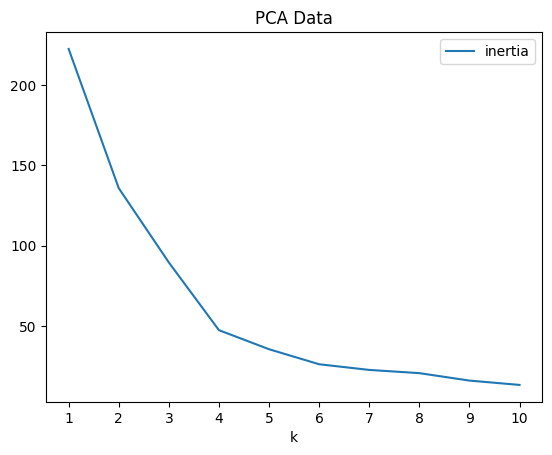

In [30]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

df_elbow_data.plot.line(
    x="k", 
    y="inertia", 
    title="PCA Data", 
    xticks=k
)

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 6


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Yes

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [31]:
# Initialize the K-Means model using the best value for k

model = KMeans(n_clusters=6, n_init='auto', random_state=1)


In [32]:
# Fit the K-Means model using the PCA data
model.fit(market_data_pca_df)

KMeans(n_clusters=6, random_state=1)

In [33]:
# Create a copy of the DataFrame with the PCA data
market_data_predictions = market_data_pca_df.copy()

# Predict the clusters to group the cryptocurrencies using the PCA data
crypto_clusters = model.predict(market_data_predictions)

# Add a new column to the DataFrame with the predicted clusters
market_data_predictions["CryptoCluster"] = crypto_clusters

# Display sample data
market_data_predictions.head()

,PCA1,PCA2,PCA3,CryptoCluster
coin_id,,,,
bitcoin,-0.810429,0.705402,0.271878,5
ethereum,-0.558137,0.646851,0.773848,5
tether,-0.373792,-0.468820,-0.511005,0
ripple,-0.396538,-0.517341,-0.299249,0
bitcoin-cash,-1.671793,2.031445,1.322526,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

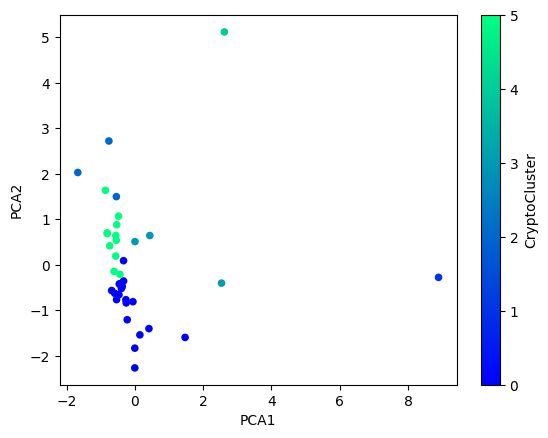

In [34]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

market_data_predictions.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="CryptoCluster",
    colormap='winter')

### Determine the Weights of Each Feature on each Principal Component

In [40]:
# Use the columns from the original scaled DataFrame as the index.
weights_df = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=scaled_df.columns)

weights_df
#pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=customers_transformed_df.columns)
#pca_component_weights

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.498471,0.208146,-0.329792
price_change_percentage_7d,-0.155403,0.442879,0.672887
price_change_percentage_14d,-0.152398,0.670403,0.119415
price_change_percentage_60d,0.191349,0.501215,-0.621532
price_change_percentage_200d,0.565660,0.230472,-0.057258
price_change_percentage_1y,0.589547,0.082219,0.186065


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:**
*
* PCA1 - price change % 1yr and price change % 60d have strongest postivie influence. Price change % 24hrs and price change % 7d have strongest negative influence.

* PCA2 - price change % 14d and price change % 60d have strongest postivie influence. None have negative influence.

* PCA3 - price change % 7d has strongest postivie influence - price change % 1y also has a positive influence . Price change % 60d and price change % 24h have strongest negative influence.
    